In [66]:
%pylab inline
from datetime import date, timedelta
import numpy as np
from netCDF4 import Dataset as ncDataset
import os
from random import randint

Populating the interactive namespace from numpy and matplotlib


In [54]:
dates = []
lats = [45, 45.6, 46, 47, 48, 50, 50.84]
lons = [150, 150.5, 152, 153, 155, 156, 156.87]

In [55]:
sst = numpy.zeros(shape=(300,7))
file_count = 0
for d, dirs, files in os.walk('dir'):
    for _file in files:
        date = 'from_file'
        dates.append(date)
        
        # open dataset
        for point_ind in dim_point:
            # read sst for lat, lon
            lat = lats[point_ind]
            lon = lons[point_ind]
            sst[file_count][point_ind] = randint(0,9)
        file_count += 1

In [ ]:
# read values from ifr

In [ ]:
dim_point = range(7)
dim_dates = len(dates)

In [56]:
export_path = '/tmp/ersst_temp.nc'
if not os.path.isdir(os.path.dirname(export_path)):
    os.mkdir(os.path.dirname(export_path))
dataset = ncDataset(export_path, 'w', format='NETCDF4')

In [57]:
dataset.createDimension('date', len(dim_dates))
dataset.createDimension('point', len(dim_point))

<type 'netCDF4._netCDF4.Dimension'>: name = 'point', size = 7

In [58]:
outVar = dataset.createVariable('date', 'string', ('date',), zlib=True, complevel=6)
outVar[:] = np.array(dates, dtype='string')

In [59]:
print date.today() + timedelta(days=i)
print type(date.today() + timedelta(days=i))
print (date.today() + timedelta(days=i)).strftime('%Y-%m-%d')
print type((date.today() + timedelta(days=i)).strftime('%Y-%m-%d'))


2016-05-31
<type 'datetime.date'>
2016-05-31
<type 'str'>


In [38]:
# dataset.variables['date'][:]

In [60]:
outVar = dataset.createVariable('lats', 'f4', ('point',), zlib=True, complevel=6)
outVar[:] = lats[:]
outVar = dataset.createVariable('lons', 'f4', ('point',), zlib=True, complevel=6)
outVar[:] = lons[:]

In [61]:
outVar = dataset.createVariable('sst', 'f4', ('date', 'point',), zlib=True, complevel=6)
outVar[:] = sst[:]

In [62]:
dataset.close()

In [63]:
!ls -la /tmp/ersst_temp.nc

-rw-rw-r-- 1 sdi sdi 26068 Aug  6 12:11 /tmp/ersst_temp.nc


In [92]:
dataset = ncDataset(export_path)
sst = dataset.variables['sst']

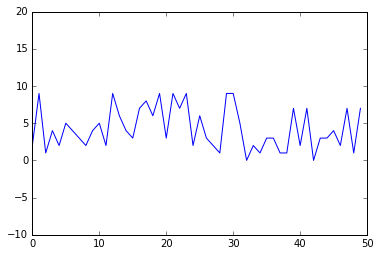

In [99]:
# imshow(sst[:6, 6:])
# colorbar()
# sst[:6, 6:].shape
plot(sst[1:100:2, :1])
ylim(-10, 20)
show()

# os.remove(export_path)
# dataset.close()

In [100]:
dataset.close()